# Pymaceuticals Inc.
---

### Analysis

- The IQR for Capomulin appears to be lowest when compared to other drugs.
- For mice taking Capomulin, there is a very strong correlation between the weight of the mouse and the average size of their tumor.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
number_of_mice = merged_df.value_counts("Mouse ID")
number_of_mice = number_of_mice.count()
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = merged_df[merged_df.duplicated(['Mouse ID' , 'Timepoint'], keep = False)]


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.loc[merged_df["Mouse ID"]!="g989",:]
cleaned_df.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_df.value_counts("Mouse ID")
number_of_mice_cleaned = number_of_mice_cleaned.count()
number_of_mice_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_mice = cleaned_df.groupby(["Drug Regimen"])
mice_tumor = grouped_mice['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_means = mice_tumor.mean()
grouped_median = mice_tumor.median()
grouped_std_dev = mice_tumor.std()
grouped_variance = grouped_std_dev**2
grouped_std_err = mice_tumor.sem()

# Assemble the resulting series into a single summary DataFrame.
grouped_summary_frame = pd.DataFrame({
    "Mean Tumor Volume": grouped_means,
    "Median Tumor Volume": grouped_median,
    "Tumor Volume Variance": grouped_variance,
    "Tumor Volume Std. Dev.": grouped_std_dev,
    "Tumor Volume Std. Err.": grouped_std_err,

})

grouped_summary_frame



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

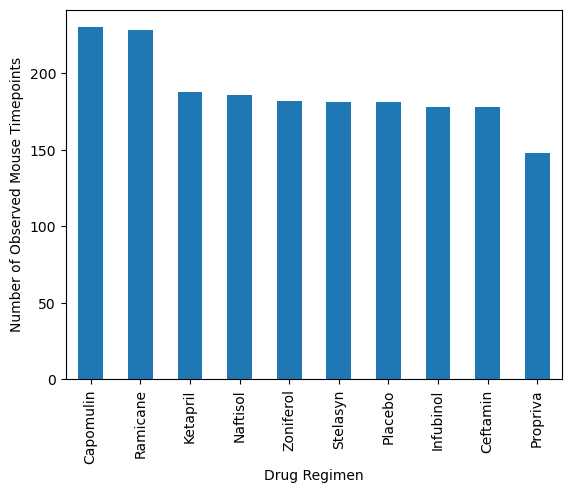

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_of_timepoints = cleaned_df["Drug Regimen"].value_counts()

graph_timepoints = num_of_timepoints.plot(kind="bar")
graph_timepoints.set_xlabel("Drug Regimen")
graph_timepoints.set_ylabel("Number of Observed Mouse Timepoints")
plt.show()

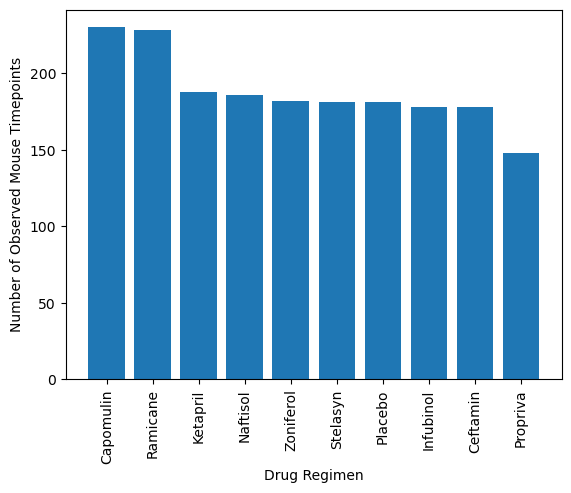

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(num_of_timepoints))
tick_locations = [value for value in x_axis]
drug_list = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo", "Infubinol", "Ceftamin", "Propriva"]

plt.bar(x_axis, num_of_timepoints)
plt.xticks(tick_locations, drug_list, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

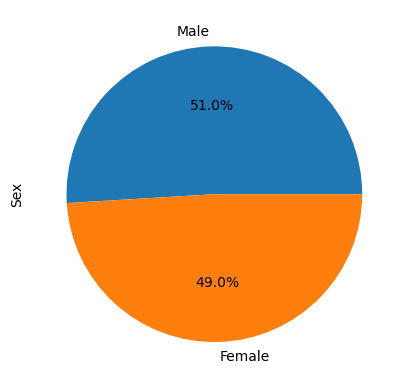

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_num = cleaned_df["Sex"].value_counts()
graph_sex = gender_num.plot(kind="pie", autopct = '%1.1f%%')

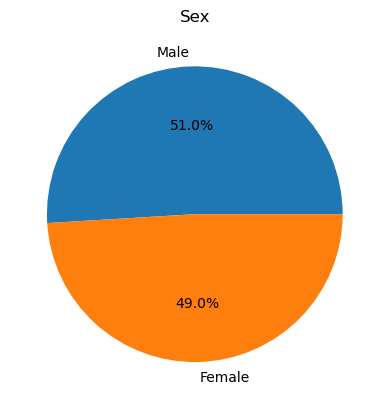

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_num, labels = labels, autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_groups = cleaned_df.groupby(["Mouse ID"])
mouse_id_groups = mouse_id_groups["Timepoint"].max()
mouse_id_groups

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
time_final_df = pd.merge(cleaned_df, mouse_id_groups, on= "Mouse ID")
time_final_df = time_final_df.rename(columns={"Timepoint_x":"Timepoint","Timepoint_y":"End_Timepoint"})
time_final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),End_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_df = time_final_df.loc[time_final_df["Drug Regimen"]==treat]

    # add subset 
    final_volume_df = drug_tumor_df.loc[drug_tumor_df["Timepoint"]==drug_tumor_df["End_Timepoint"]]
    final_volume = final_volume_df["Tumor Volume (mm3)"]

    tumor_vol_data.append(final_volume)
    
    # Calculate upper and lower quartile and IQR 
    tumor_quartiles = final_volume.quantile([.25,.5,.75])
    upperq = tumor_quartiles[.75]
    lowerq = tumor_quartiles[.25]
    iqr = (upperq - lowerq)
    print(f"The IQR for {treat} is {iqr}")
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_volume_df.loc[(final_volume_df["Tumor Volume (mm3)"]>=upper_bound) | (final_volume_df["Tumor Volume (mm3)"]<=lower_bound),:]
    print(f"The number of outliers for {treat} is {outliers['Sex'].count()}")



The IQR for Capomulin is 7.781863460000004
The number of outliers for Capomulin is 0
The IQR for Ramicane is 9.098536719999998
The number of outliers for Ramicane is 0
The IQR for Infubinol is 11.477135160000003
The number of outliers for Infubinol is 1
The IQR for Ceftamin is 15.577752179999997
The number of outliers for Ceftamin is 0


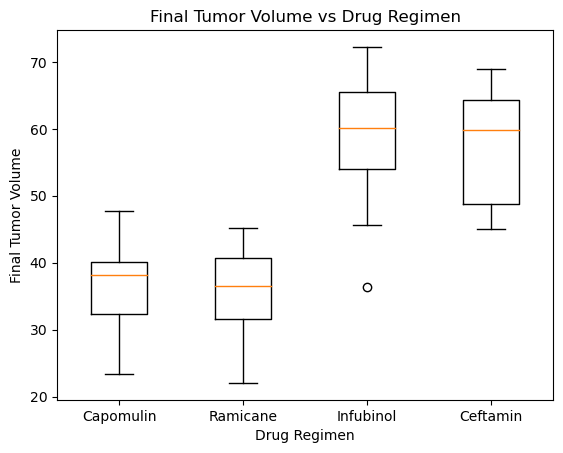

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.title("Final Tumor Volume vs Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

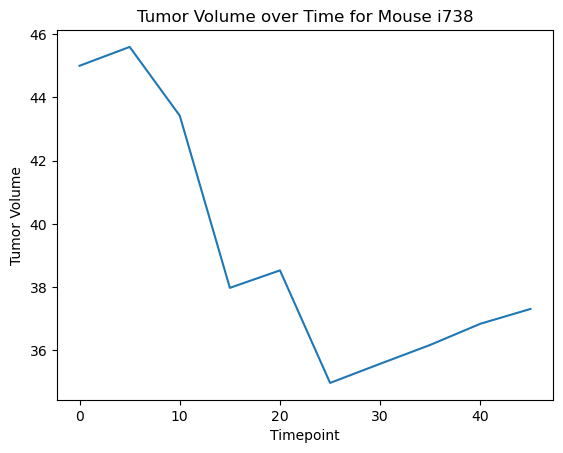

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"]=="i738"]
mouse_df = mouse_df.set_index("Timepoint")
mouse_df = mouse_df["Tumor Volume (mm3)"]

# Create Line Graph
mouse_graph = mouse_df.plot(kind="line")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over Time for Mouse i738")
plt.show()

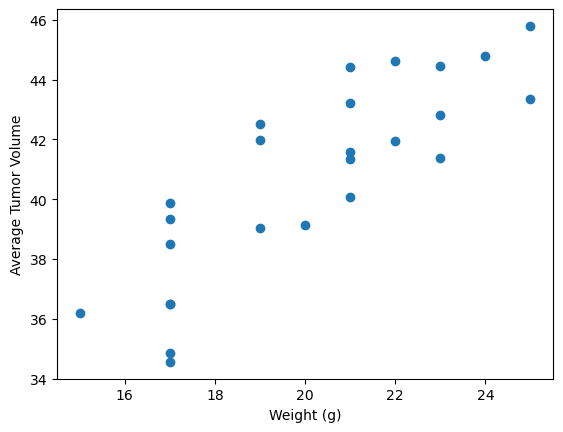

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create Data Series to Format Data
scatter_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
scatter_df = scatter_df.groupby("Mouse ID")
average_tumor = scatter_df["Tumor Volume (mm3)"].mean()
average_weight = scatter_df["Weight (g)"].mean()

# Graph Equation
plt.scatter(average_weight,average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

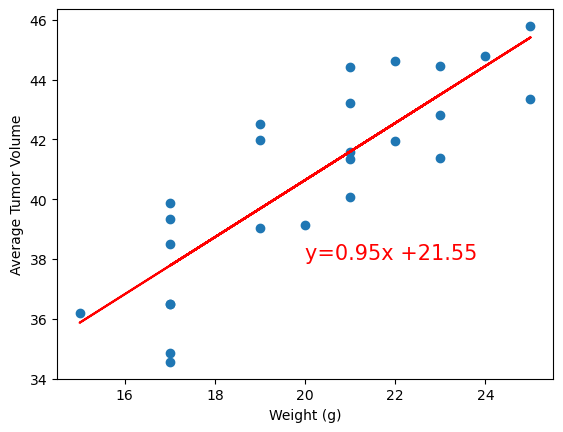

The correlation between mouse weight and average tumor is 0.84


In [99]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_weight,average_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_weight,average_tumor)
regress_values = average_weight * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" +str(round(intercept,2))

# Plotting and formatting
plt.plot(average_weight, regress_values, "r-")
plt.annotate(line_eq,(20,38), fontsize=15, color ="red")
plt.scatter(average_weight,average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

# Print correlation
print(f"The correlation between mouse weight and average tumor is {round(correlation[0],2)}")